In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
file_path = '../Data/Week2_challenge_data_source.xlsx'  # Adjust path if needed
data = pd.read_excel(file_path)

# Display basic info
display(data.head())
data.info()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [3]:
# Aggregate session frequency, duration, and total traffic per customer (MSISDN/Number)
engagement_metrics = data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum', 
    'Total UL (Bytes)': 'sum', 
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Add total traffic column (Total Data Volume)
engagement_metrics['Total Data Volume (Bytes)'] = engagement_metrics['Total UL (Bytes)'] + engagement_metrics['Total DL (Bytes)']

# Display the aggregated engagement metrics
display(engagement_metrics.head())
#'Dur. (ms)'

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
0,3.360100e+10,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,37104.0,94280527.0,1.363130e+09,1.457411e+09


In [4]:
# Cell 4: Normalize Engagement Metrics
# Normalize the engagement metrics (session duration and traffic)
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']])

# Convert normalized metrics back to DataFrame
normalized_metrics_df = pd.DataFrame(normalized_metrics, columns=['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)'])
normalized_metrics_df['MSISDN/Number'] = engagement_metrics['MSISDN/Number']

# Display normalized metrics
display(normalized_metrics_df.head())


,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes),MSISDN/Number
0,-0.158014,-0.596125,0.449862,0.382297,3.360100e+10
1,0.188148,-0.594685,-1.104067,-1.087666,3.360100e+10
2,-0.060090,-0.504876,-0.165736,-0.193453,3.360100e+10
3,-0.516690,-1.037143,-0.498672,-0.547071,3.360101e+10
4,-0.585235,1.036840,1.570279,1.560825,3.360101e+10


,Cluster,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
0,0,106849.470045,4.349578e+07,4.571208e+08,5.006166e+08
1,1,648481.100058,1.824859e+08,2.172573e+09,2.355059e+09
2,2,222018.646399,9.264267e+07,1.095482e+09,1.188125e+09


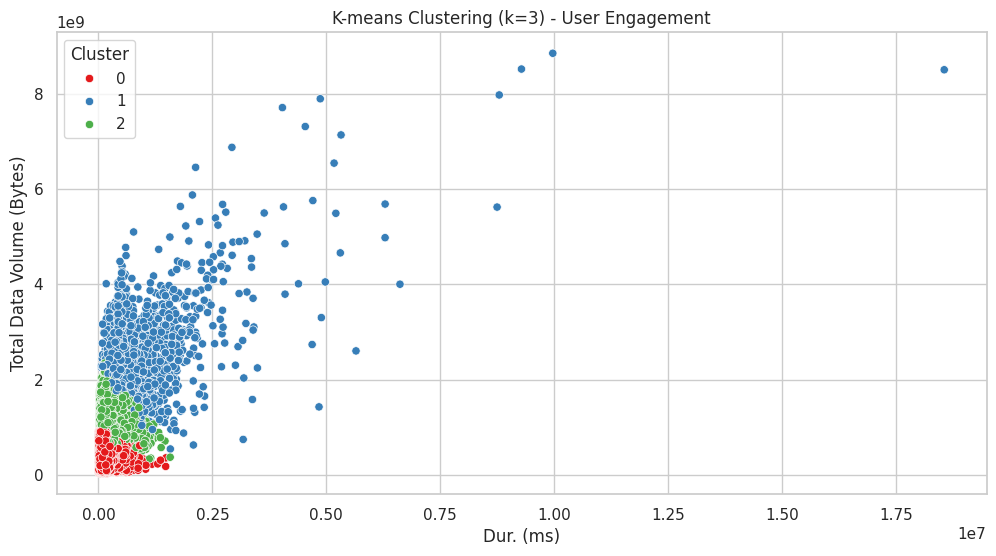

In [5]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Display the clusters and some statistics
cluster_summary = engagement_metrics.groupby('Cluster').agg({
    'Dur. (ms)': 'mean', 
    'Total UL (Bytes)': 'mean', 
    'Total DL (Bytes)': 'mean',
    'Total Data Volume (Bytes)': 'mean'
}).reset_index()

display(cluster_summary)

# Plot the clusters
sns.scatterplot(x='Dur. (ms)', y='Total Data Volume (Bytes)', hue='Cluster', data=engagement_metrics, palette='Set1')
plt.title('K-means Clustering (k=3) - User Engagement')
plt.xlabel('Dur. (ms)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()


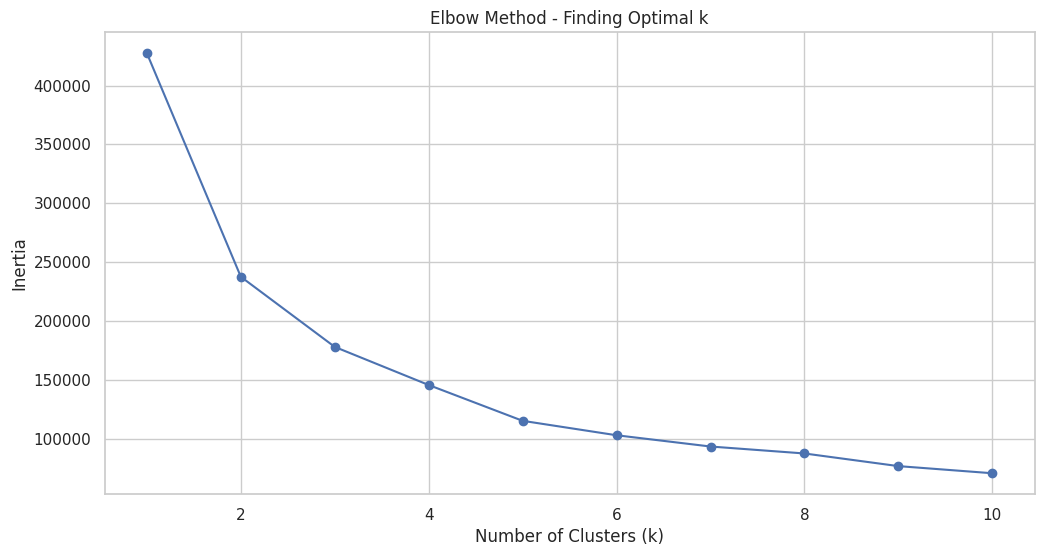

In [6]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Finding Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Social Media DL (Bytes)      2.693001e+11
Google DL (Bytes)            8.626186e+11
Email DL (Bytes)             2.687611e+11
Youtube DL (Bytes)           1.745123e+12
Netflix DL (Bytes)           1.744039e+12
Gaming DL (Bytes)            6.330713e+13
Other DL (Bytes)             6.316550e+13
Social Media UL (Bytes)      4.939298e+09
Google UL (Bytes)            3.084833e+11
Email UL (Bytes)             7.010648e+10
Youtube UL (Bytes)           1.651423e+12
Netflix UL (Bytes)           1.650274e+12
Gaming UL (Bytes)            1.243268e+12
Other UL (Bytes)             1.239728e+12
Total Data Volume (Bytes)    1.375307e+14
dtype: float64

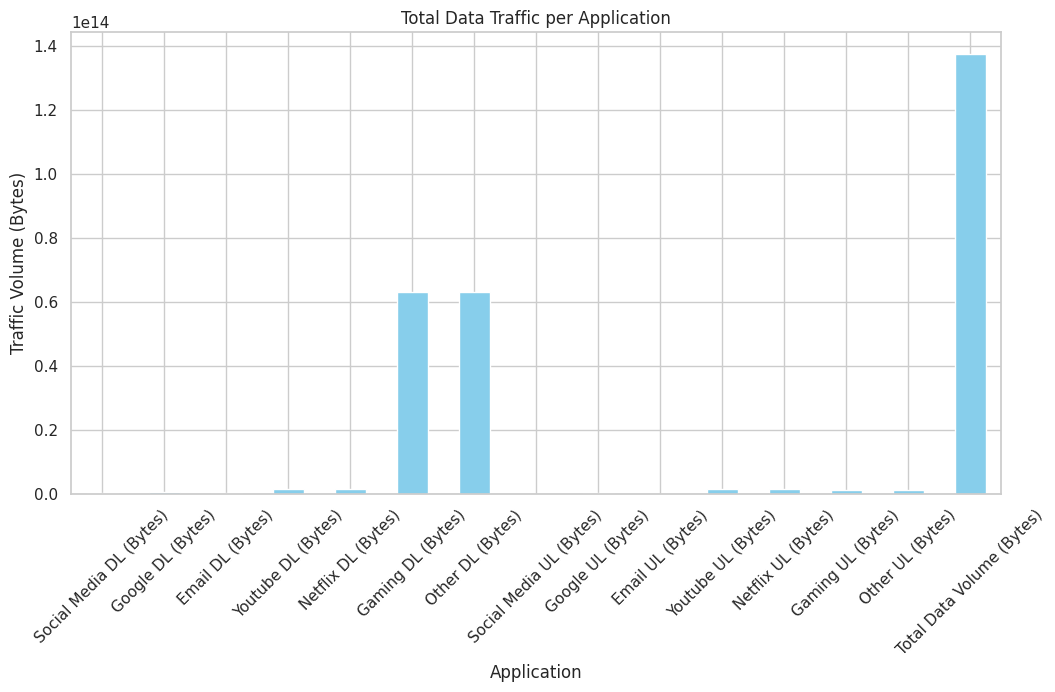

In [10]:
# Aggregate traffic per application (sum of DL and UL Bytes for each application)
app_traffic = data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                    'Other DL (Bytes)', 
                    'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 
                    'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 
                    'Other UL (Bytes)']].sum()

# Total traffic per application (DL + UL)
app_traffic['Total Data Volume (Bytes)'] = app_traffic.sum()

# Display the application traffic data
display(app_traffic)


# Plot the aggregated traffic per application
app_traffic.plot(kind='bar', color='skyblue')
plt.title('Total Data Traffic per Application')
plt.ylabel('Traffic Volume (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=45)
plt.show()



In [15]:
# Create a new column "Application" based on traffic types
def categorize_application(row):
    if row['Social Media DL (Bytes)'] > 0:
        return 'Social Media'
    elif row['Google DL (Bytes)'] > 0:
        return 'Google'
    elif row['Email DL (Bytes)'] > 0:
        return 'Email'
    elif row['Youtube DL (Bytes)'] > 0:
        return 'Youtube'
    else:
        return 'Other'

data['Application'] = data.apply(categorize_application, axis=1)

top_users_app = data.groupby(['Application', 'MSISDN/Number']).agg({
    'Dur. (ms)': 'sum', 
    'Total UL (Bytes)': 'sum', 
    'Total DL (Bytes)': 'sum'
}).reset_index()

# Get the top 10 users for each application by sorting and selecting the top 10 directly
top_users_per_app = top_users_app.sort_values(by=['Application', 'Dur. (ms)'], ascending=[True, False]) \
                                .groupby('Application').head(10).reset_index(drop=True)

# Display top 10 users for each application
display(top_users_per_app)


,Application,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,Social Media,3.362578e+10,18553754.0,729577380.0,7.770043e+09
1,Social Media,3.361489e+10,9966898.0,689483001.0,8.156743e+09
2,Social Media,3.376054e+10,9279434.0,703478581.0,7.811295e+09
3,Social Media,3.362632e+10,8791927.0,669650721.0,7.301517e+09
4,Social Media,3.366716e+10,8744914.0,566326364.0,5.052068e+09
5,Social Media,3.366284e+10,6614270.0,406424372.0,3.593674e+09
6,Social Media,3.366469e+10,6288730.0,402180804.0,5.279827e+09
7,Social Media,3.360313e+10,6287761.0,435587631.0,4.540607e+09
8,Social Media,3.366746e+10,5649882.0,266222647.0,2.334299e+09
9,Social Media,3.376041e+10,5321667.0,521518890.0,6.610852e+09


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [17]:
# Selecting relevant columns for clustering
clustering_data = top_users_app[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']]


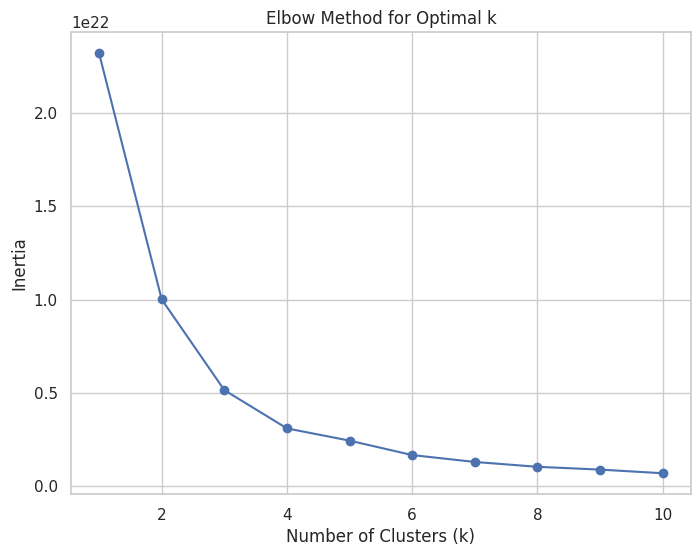

In [18]:
# Calculate inertia for different values of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
